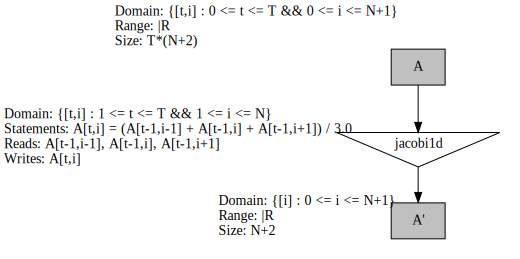

In [3]:
import graphviz as gv
import pdfg.pdfgs as pdfg

spec = """
# Jacobi1D Graph Spec
name("jacobi1d");
A:={[t,i]:0 <= t <= T && 0 <= i <= N+1};
A':={[i]:0 <= i <= N+1};
jacobi:={[t,i]:1 <= t <= T && 1 <= i <= N};
statement(jacobi):=A'[t,i]=A[t-1,i-1]+A[t-1,i]+A[t-1,i+1] * 0.33333;
"""
g = pdfg.from_spec(spec)
g.graphgen()



In [10]:
spec = """
# Jacobi1D Graph Spec
name("jacobi1d");
A:={[t,i]:0 <= t <= T && 0 <= i <= N+1};
A':={[i]:0 <= i <= N+1};
jacobi:={[t,i]:1 <= t <= T && 1 <= i <= N};
statement(jacobi):=A[t,i]=A[t-1,i-1]+A[t-1,i]+A[t-1,i+1]*0.333333;
"""
g = mdfgs.from_spec(spec)
print(g.codegen())


#include <stdio.h>
#include <stdlib.h>
#include <sys/time.h>

#define min(x,y) (((x)<(y))?(x):(y))
#define max(x,y) (((x)>(y))?(x):(y))
#define intdiv(x,y) ((y)>0)?((x)/(y)):0
#define floord(n,d) intdiv((n),(d))
#define get_time(tval) { struct timeval tv; gettimeofday(&tv, 0); double tval=(double) tv.tv_sec + (((double) tv.tv_usec) * 1E-6); }
#define index(t,i) ((t)&1)*(N+2)+(i)

typedef float real;

#define N 100000
#define T 100000

void jacobi1d();
inline void jacobi1d() {
  real A[T*(N+2)] = {0};
  real A_prime[N+2] = {0};

#define jacobi(t,i) A[(t),(i)] = (A[(t)-1,(i)-1] + A[(t)-1,(i)] + A[(t)-1,(i)+1]) / 3.0

for (int c0 = 1; c0 <= T; c0 += 1)
  for (int c1 = 1; c1 <= N; c1 += 1)
    jacobi(c0, c1);

}  // jacobi1d

int main(int argc, const char ** argv) {
  get_time(tstart);

  jacobi1d();

  get_time(tstop);
  fprintf(stderr,"jacobi1d::%.6lf seconds elapsed\n", (tstop - tstart));
}  // main



In [1]:
import pdfg.pdfgs as pdfg
from tools.files import read, write
from tools.system import run

name = 'jacobi2d'
spec = """
# Jacobi2D Graph Spec
name("%s");
A:={[t,i,j]: 0 <= t < 2 && 0 <= i <= M+1 && 0 <= j <= N+1};
out:={[i,j]: 0 <= i <= M+1 && 0 <= j <= N+1};
init:={[i,j]: 1 <= i <= M && 1 <= j <= N};
statement(init):="A[0,i,j] = rand() / (real) rand()";
stencil:={[t,i,j]: 1 <= t <= T && 1 <= i <= M && 1 <= j <= N};
statement(stencil):="A[t,i,j] = (A[t-1,i,j-1] + A[t-1,i,j] + A[t-1,i,j+1] + A[t-1,i-1,j] + A[t-1,i+1,j]) * 0.2";
""" % name
g = pdfg.from_spec(spec)
code = g.codegen()

path = '%s.c' % name
write(path, [code])
cmd = 'gcc %s -fopenmp -O3 -lm -o %s' % (path, name)
(out, err) = run(cmd)
if len(out) > 0:
    print(out)
if len(err) > 0:
    print(err)
else:
    run('./%s' % name, verbose=True)


Error:

jacobi2d::0.000000 seconds elapsed



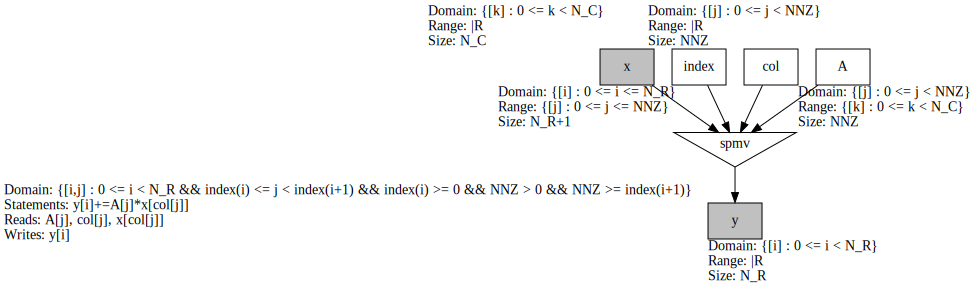

In [6]:
spec = """
# CSR-SpMV Graph Spec
name('csr_spmv');
A := {[j] : 0 <= j < NNZ};
col := {[j] : 0 <= j < NNZ};
index := {[i] : 0 <= i <= N_R};
x := {[k] : 0 <= k < N_C};
y := {[i] : 0 <= i < N_R};
spmv := {[i,j]: 0 <= i < N_R && index(i) <= j < index(i+1) && j >= 0 && j < NNZ};
statement(spmv):=y[i]+=A[j]*x[col[j]];
"""
g = pdfg.from_spec(spec)
#print(g.codegen())
g.graphgen()
#print(g.graphgen())


In [2]:
spec = """
# CSR-SpMV Graph Spec
name('csr_spmv');
A := {[j] : 0 <= j < NNZ};
col := {[j] : 0 <= j < NNZ};
index := {[i] : 0 <= i <= N_R};
x := {[k] : 0 <= k < N_C};
y := {[i] : 0 <= i < N_R};
spmv := {[i,j]: 0 <= i < N_R && index(i) <= j < index(i+1) && j >= 0 && j < NNZ};
statement(spmv):=y[i]+=A[j]*x[col[j]];
"""
g = pdfgs.from_spec(spec)
print(g.codegen())



NameError: name 'mdfgs' is not defined

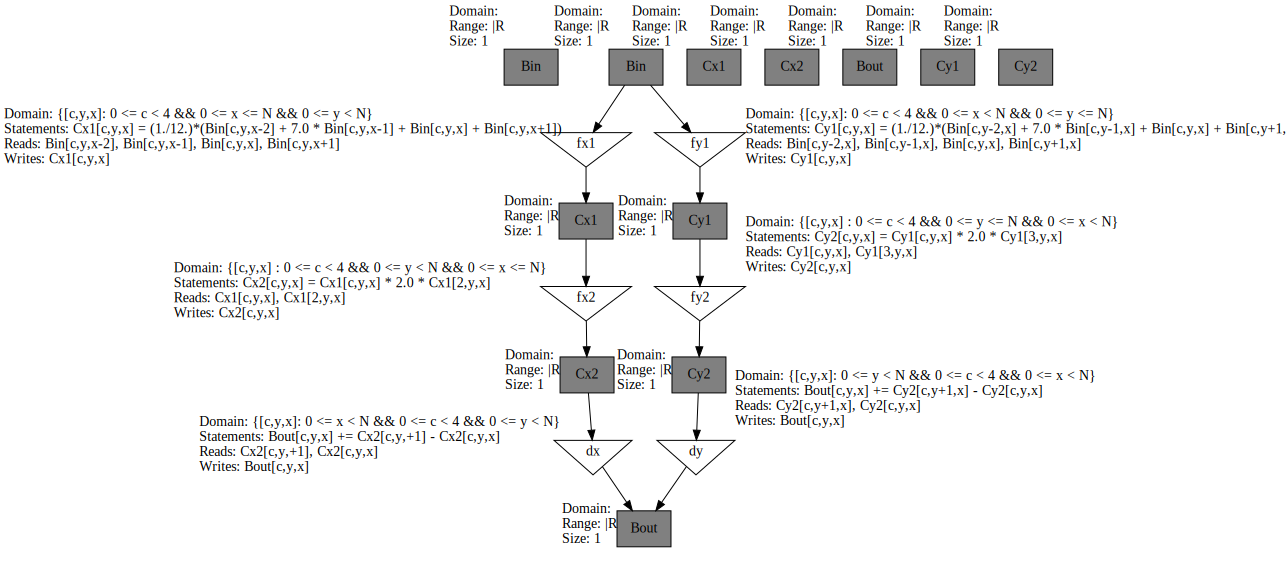

In [3]:
from codegen.mdfgs import *

spec = """
# MFD-2D Graph Spec
name("mfd-2d");
# X-Direction
fx1 := {[c,y,x]: 0 <= c < 4 && 0 <= x <= N && 0 <= y < N};
fx2 := {[c,y,x]};
dx := {[c,y,x]: 0 <= x < N};

# Y-Direction
fy1 := {[c,y,x]: 0 <= c < 4 && 0 <= x < N && 0 <= y <= N};
fy2 := {[c,y,x]};
dy := {[c,y,x]: 0 <= y < N};

# Statements
statement(fx1) := "Cx1[c,y,x] = (1./12.)*(Bin[c,y,x-2] + 7.0 * Bin[c,y,x-1] + Bin[c,y,x] + Bin[c,y,x+1])";
statement(fx2) := "Cx2[c,y,x] = Cx1[c,y,x] * 2.0 * Cx1[2,y,x]";
statement(dx) := "Bout[c,y,x] += Cx2[c,y,+1] - Cx2[c,y,x]";
statement(fy1) := "Cy1[c,y,x] = (1./12.)*(Bin[c,y-2,x] + 7.0 * Bin[c,y-1,x] + Bin[c,y,x] + Bin[c,y+1,x])";
statement(fy2) := "Cy2[c,y,x] = Cy1[c,y,x] * 2.0 * Cy1[3,y,x]";
statement(dy) := "Bout[c,y,x] += Cy2[c,y+1,x] - Cy2[c,y,x]";
"""
g = PDFGParser().parse(spec)
#print(g.codegen())
g.graphgen()
